# ATSSB_Prob59_Log_h02_Model

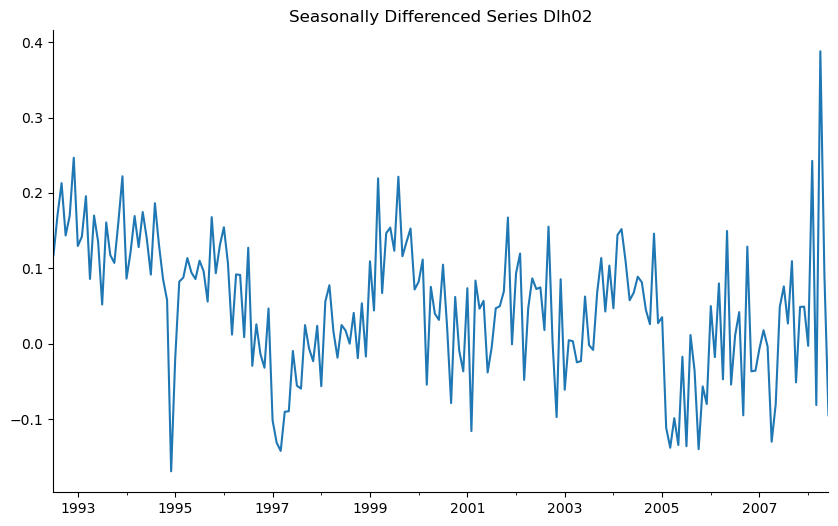

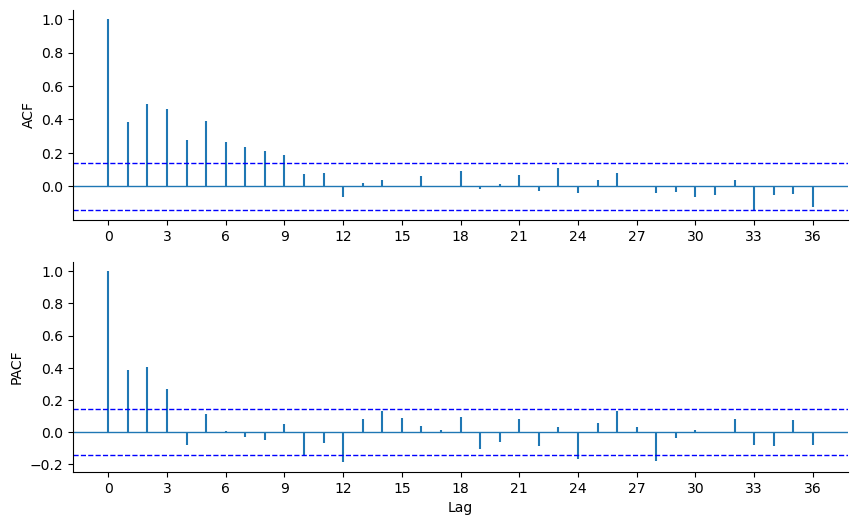


===== KPSS on Dlh02 =====
(np.float64(0.5757052020338037), np.float64(0.024844981633290568), 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


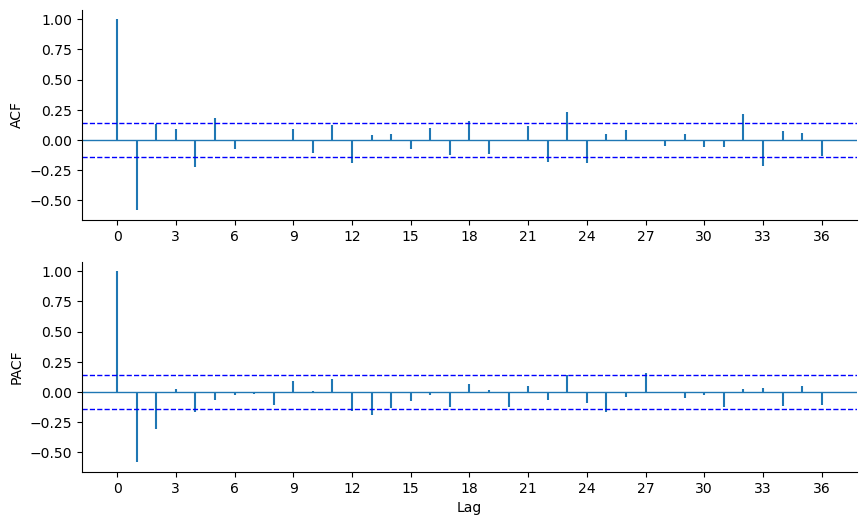


===== KPSS on Ddlh02 =====
(np.float64(0.01618675046917281), np.float64(0.1), 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

===== SARIMA(2,1,[2,4])(0,1,2)_12 =====
                                        SARIMAX Results                                        
Dep. Variable:                                     h02   No. Observations:                  204
Model:             SARIMAX(2, 1, [2, 4])x(0, 1, 2, 12)   Log Likelihood                 252.039
Date:                                 Fri, 20 Feb 2026   AIC                           -490.078
Time:                                         17:22:20   BIC                           -467.312
Sample:                                     07-31-1991   HQIC                          -480.857
                                          - 06-30-2008                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|

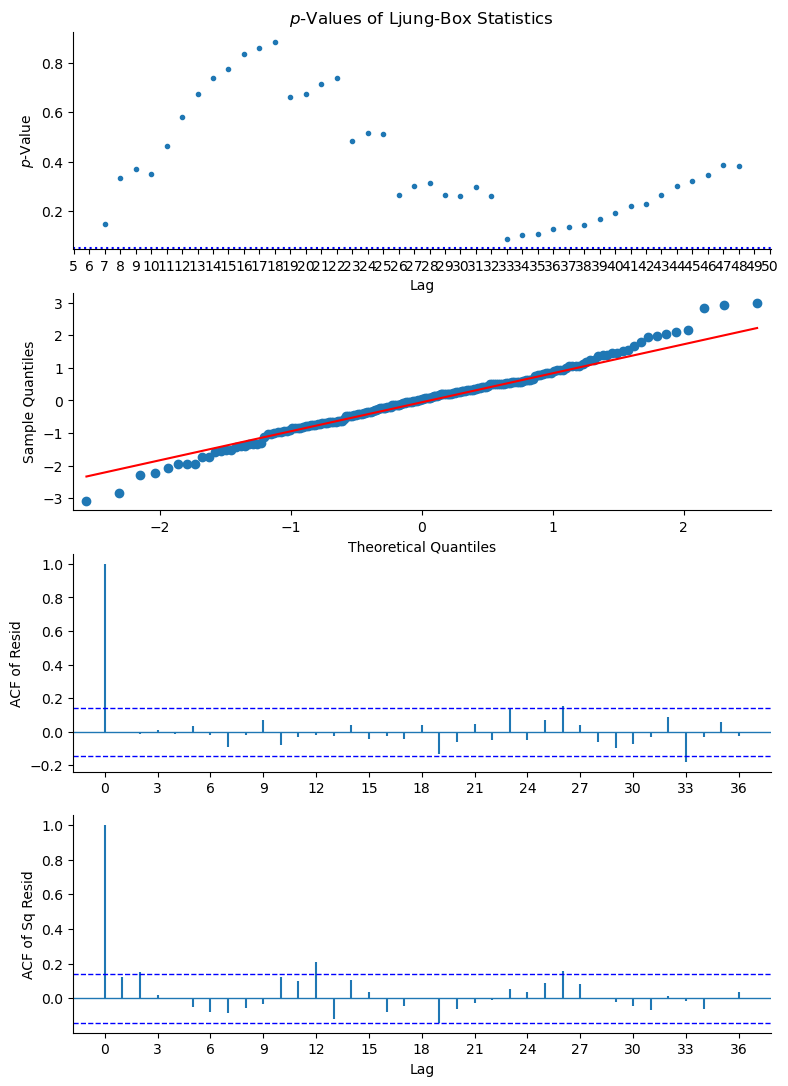


Problem 5.9 charts saved successfully.


In [5]:
# ==========================================================
# ATSSB – Problem 5.9
# Log-transform and build SARIMA model for lh02
# ==========================================================

from pathlib import Path
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.ModResidDiag import plot_ResidDiag
from PythonTsa.datadir import getdtapath

# ==========================================================
# Global plot style
# ==========================================================

plt.rcParams.update({
    "figure.figsize": (10,6),
    "figure.facecolor": "none",
    "axes.facecolor": "none",
    "savefig.transparent": True,
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False
})

# ==========================================================
# Output folder
# ==========================================================

FIG_DIR = Path("Prob59_figs")
FIG_DIR.mkdir(exist_ok=True)

def save_fig(name):
    fig = plt.gcf()
    fig.savefig(FIG_DIR / f"{name}.png",
                dpi=300,
                transparent=True,
                bbox_inches="tight")
    fig.savefig(FIG_DIR / f"{name}.pdf",
                transparent=True,
                bbox_inches="tight")

# ==========================================================
# Load h02 data
# ==========================================================

dtapath = getdtapath()

h02 = pd.read_csv(
    dtapath + 'h02July1991June2008.csv',
    header=0
)

dates = pd.date_range(start='1991-07',
                      periods=len(h02),
                      freq='ME')

h02.index = dates
h02 = pd.Series(h02['h02'])

# ==========================================================
# Log transform
# ==========================================================

lh02 = np.log(h02)

# ==========================================================
# Seasonal difference
# Dlh02 = (1 - B^12) ln(h02)
# ==========================================================

Dlh02 = sm.tsa.statespace.tools.diff(
    lh02,
    k_diff=0,
    k_seasonal_diff=1,
    seasonal_periods=12
)

# Plot seasonal differenced series
Dlh02.plot(title="Seasonally Differenced Series Dlh02")
save_fig("Tplot_Dlh02")
plt.show()

# ACF / PACF
acf_pacf_fig(Dlh02, both=True, lag=36)
save_fig("ACF_Dlh02")
plt.show()

# KPSS test
print("\n===== KPSS on Dlh02 =====")
print(sm.tsa.kpss(Dlh02, regression='c', nlags='auto'))

# ==========================================================
# First + seasonal difference
# Ddlh02 = (1 - B)(1 - B^12) ln(h02)
# ==========================================================

Ddlh02 = sm.tsa.statespace.tools.diff(
    lh02,
    k_diff=1,
    k_seasonal_diff=1,
    seasonal_periods=12
)

acf_pacf_fig(Ddlh02, both=True, lag=36)
save_fig("ACF_Ddlh02")
plt.show()

print("\n===== KPSS on Ddlh02 =====")
print(sm.tsa.kpss(Ddlh02, regression='c', nlags='auto'))

# ==========================================================
# Fit SARIMA(2,1,[2,4])(0,1,2)_12
# ==========================================================

sarima224Dd02 = sm.tsa.SARIMAX(
    lh02,
    order=(2,1,[2,4]),
    seasonal_order=(0,1,2,12),
    trend='n'
)

sarimafit224Dd02 = sarima224Dd02.fit(method='powell', disp=False)

print("\n===== SARIMA(2,1,[2,4])(0,1,2)_12 =====")
print(sarimafit224Dd02.summary())

# ==========================================================
# Diagnostics
# ==========================================================

resid224Dd02 = sarimafit224Dd02.resid[13:]  # drop 1+12

plot_ResidDiag(
    resid224Dd02,
    noestimatedcoef=6,
    nolags=48,
    lag=36
)

save_fig("Diag_SARIMA_224Dd02")
plt.show()

print("\nProblem 5.9 charts saved successfully.")


KPSS Dlh02: (np.float64(0.5757052020338037), np.float64(0.024844981633290568), 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Ddlh02: (np.float64(0.01618675046917281), np.float64(0.1), 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


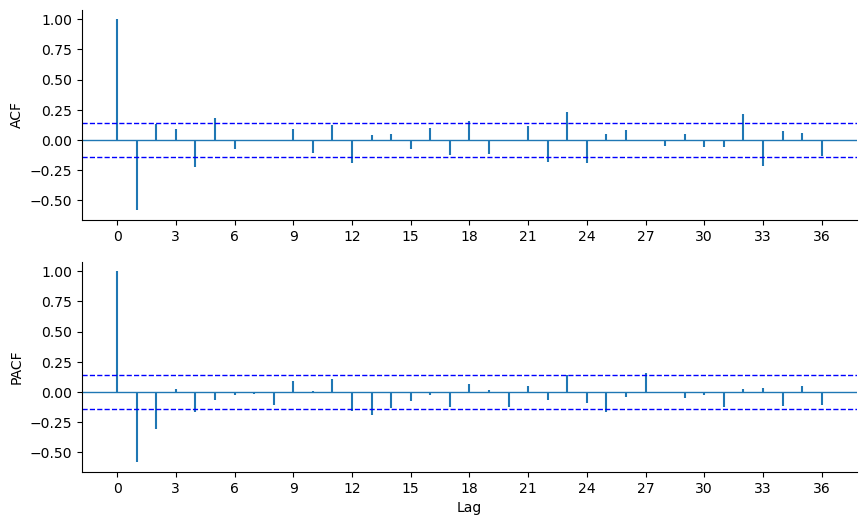


Top 15 by AIC (with Ljung–Box min p-value):
    order      seasonal         AIC         BIC        HQIC  LB_min_p  converged
(2, 1, 0) (0, 1, 1, 12) -447.372207 -434.645073 -442.211013  0.326848       True
(3, 1, 1) (0, 1, 1, 12) -446.013419 -426.956521 -438.284681  0.207104      False
(3, 1, 0) (0, 1, 1, 12) -445.938158 -430.029240 -439.486665  0.373684       True
(3, 1, 2) (1, 1, 1, 12) -444.272585 -418.908713 -433.985124  0.354895      False
(2, 1, 1) (0, 1, 1, 12) -443.885843 -428.005095 -437.445229  0.104888       True
(2, 1, 0) (1, 1, 1, 12) -443.179847 -427.299098 -436.739232  0.201320       True
(3, 1, 2) (0, 1, 1, 12) -443.114845 -420.921457 -434.113317  0.412744       True
(2, 1, 1) (1, 1, 1, 12) -442.847609 -423.790710 -435.118871  0.148648       True
(2, 1, 3) (0, 1, 1, 12) -441.696132 -419.542630 -432.710041  0.007089      False
(3, 1, 1) (1, 1, 1, 12) -441.216057 -419.022669 -432.214529  0.273190      False
(2, 1, 3) (0, 1, 0, 12) -440.975479 -421.588828 -433.120000  0.0

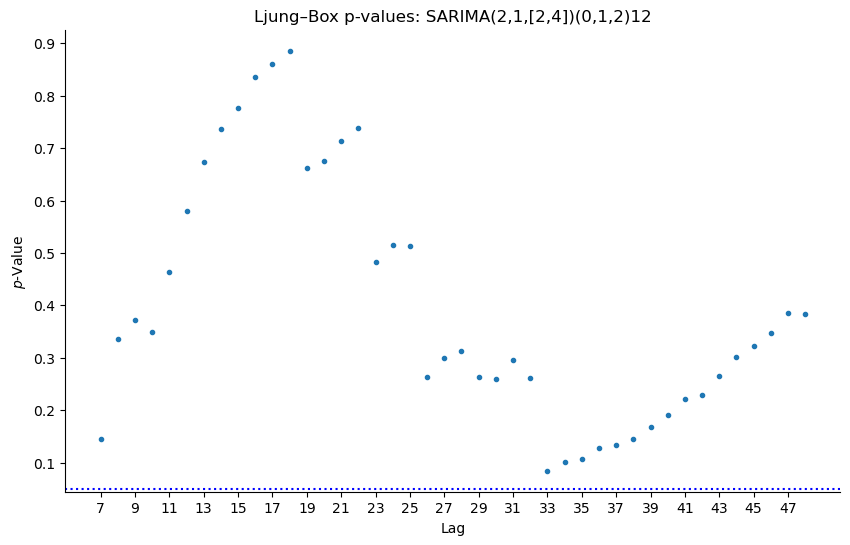

In [6]:
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.datadir import getdtapath

warnings.filterwarnings("ignore")

# ----------------------------
# Plot style (transparent, no grid, legend bottom)
# ----------------------------
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "figure.facecolor": "none",
    "axes.facecolor": "none",
    "savefig.transparent": True,
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False
})

FIG_DIR = Path("Prob59_selection_figs")
FIG_DIR.mkdir(exist_ok=True)

def savefig(name: str):
    fig = plt.gcf()
    fig.savefig(FIG_DIR / f"{name}.png", dpi=300, transparent=True, bbox_inches="tight")
    fig.savefig(FIG_DIR / f"{name}.pdf", transparent=True, bbox_inches="tight")

# ----------------------------
# Load data
# ----------------------------
dtapath = getdtapath()
h02 = pd.read_csv(dtapath + "h02July1991June2008.csv", header=0)
dates = pd.date_range(start="1991-07", periods=len(h02), freq="ME")
h02.index = dates
h02 = pd.Series(h02["h02"])

lh02 = np.log(h02)

# ----------------------------
# 1) Differencing choice (Hyndman): decide d and D first
# Here: monthly, strong seasonality => try D=1
# KPSS confirms need for d=1 as well (as in your solution)
# ----------------------------
D = 1
d = 1
s = 12

Dlh02 = sm.tsa.statespace.tools.diff(lh02, k_diff=0, k_seasonal_diff=D, seasonal_periods=s)
Ddlh02 = sm.tsa.statespace.tools.diff(lh02, k_diff=d, k_seasonal_diff=D, seasonal_periods=s)

print("KPSS Dlh02:", sm.tsa.kpss(Dlh02, regression="c", nlags="auto"))
print("KPSS Ddlh02:", sm.tsa.kpss(Ddlh02, regression="c", nlags="auto"))

# ----------------------------
# 2) ACF/PACF guidance for candidate sets
# Hyndman suggests using ACF/PACF after differencing to propose small p,q,P,Q
# ----------------------------
acf_pacf_fig(Ddlh02, both=True, lag=36)
savefig("ACF_PACF_Ddlh02")
plt.show()

# Practical candidate sets (small, conservative):
# nonseasonal p,q usually 0..3; seasonal P,Q usually 0..2
# We'll keep it tight for trial & error
p_set = [0, 1, 2, 3]
q_set = [0, 1, 2, 3]
P_set = [0, 1, 2]
Q_set = [0, 1, 2]

# Optional: restrict to "reasonable" combos to avoid overfitting
# e.g., avoid both p and q being 3 simultaneously, etc.
def reasonable(p, q, P, Q):
    if p == 3 and q == 3:
        return False
    if P == 2 and Q == 2:
        return False
    return True

# ----------------------------
# 3) Guided trial & error grid search with diagnostics
# Score by AIC/BIC; keep Ljung–Box p-values in report
# ----------------------------
def ljung_box_min_p(resid, lags=24):
    # robust minimal Ljung-Box p-value across lags 1..lags
    # (quick adequacy indicator; you still inspect plots later)
    lb = sm.stats.acorr_ljungbox(resid, lags=list(range(1, lags+1)), return_df=True)
    return float(lb["lb_pvalue"].min())

results = []

for p in p_set:
    for q in q_set:
        for P in P_set:
            for Q in Q_set:
                if not reasonable(p, q, P, Q):
                    continue
                try:
                    mod = sm.tsa.SARIMAX(
                        lh02,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        trend="n",
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    fit = mod.fit(disp=False)

                    resid = fit.resid.dropna()
                    # drop first d + D*s residuals for fair LB (book style often trims)
                    resid_trim = resid[(d + D*s):] if len(resid) > (d + D*s) else resid

                    results.append({
                        "order": (p, d, q),
                        "seasonal": (P, D, Q, s),
                        "AIC": float(fit.aic),
                        "BIC": float(fit.bic),
                        "HQIC": float(fit.hqic),
                        "LB_min_p": ljung_box_min_p(resid_trim, lags=24),
                        "converged": bool(getattr(fit, "mle_retvals", {}).get("converged", True))
                    })
                except Exception:
                    continue

df = pd.DataFrame(results)
df = df.sort_values(["AIC", "BIC"]).reset_index(drop=True)

print("\nTop 15 by AIC (with Ljung–Box min p-value):")
print(df.head(15).to_string(index=False))

# Keep only adequate-ish candidates: Ljung–Box min p > 0.05
df_ok = df[df["LB_min_p"] > 0.05].copy().reset_index(drop=True)

print("\nTop 10 ADEQUATE (LB_min_p > 0.05) by AIC:")
print(df_ok.head(10).to_string(index=False))

# ----------------------------
# 4) Fit the chosen model (your book choice) and save LB p-value plot
# ----------------------------
chosen_order = (2, 1, [2, 4])
chosen_seasonal = (0, 1, 2, 12)

fit = sm.tsa.SARIMAX(
    lh02,
    order=chosen_order,
    seasonal_order=chosen_seasonal,
    trend="n"
).fit(method="powell", disp=False)

print("\nChosen model summary:")
print(fit.summary())

# Ljung–Box p-values plot (PythonTsa)
resid = fit.resid[13:]  # book-style trim: 1 + 12
plot_LB_pvalue(resid, noestimatedcoef=6, nolags=48)
plt.title("Ljung–Box p-values: SARIMA(2,1,[2,4])(0,1,2)12")
savefig("LB_pvalues_chosen")
plt.show()
